# 02_EDGE — Image Edge Detection
**Nama:** Versa Syahputra  
**NIM:** 23525041

## 🎯 Tujuan
Deteksi tepi bertujuan menemukan perubahan intensitas tajam pada citra
yang menandakan batas antar objek. Tepi merepresentasikan perubahan
gradien (derivatif/turunan) intensitas piksel.


## 🧠 Teori Edge Detection & Parameter

### Sobel Operator
Metode Sobel menggunakan dua kernel konvolusi (Gx dan Gy) untuk
menghitung gradien arah horizontal dan vertikal.

Parameter utama:
- `kernel_size`: ukuran kernel (3, 5, atau 7). Kernel besar menghasilkan tepi lebih halus tapi bisa kehilangan detail.

### Canny Edge Detector
Metode Canny lebih kompleks, terdiri dari empat tahap utama:
1) Gaussian blur → mengurangi noise pada citra
2) Perhitungan gradien intensitas → mendeteksi perubahan arah tepi (mirip Sobel)
3) Non-maximum suppression → mempertahankan hanya tepi yang paling tajam
4) Hysteresis thresholding → menentukan tepi kuat dan lemah berdasarkan dua nilai ambang

Parameter yang memengaruhi:
- `threshold1` (low) : batas bawah intensitas gradien.
- `threshold2` (high): batas atas intensitas gradien.
- `apertureSize` (opsional): ukuran kernel Sobel internal (default = 3).

> Pemanggilan `cv2.Canny(image, threshold1, threshold2)` **secara otomatis** menjalankan keempat tahap di atas. <br>
> OpenCV mengimplementasikannya sebagai fungsi terintegrasi yang sudah mencakup 
> Gaussian smoothing, perhitungan gradien, non-maximum suppression, dan hysteresis thresholding.



## Implementasi Edge Detection

### Fungsi pendukung dan import module

In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import cv2

def show_images(images: list[np.ndarray], titles: list[str], suptitle: str) -> None:
    """
    Menampilkan beberapa gambar dengan judul yang sesuai dalam satu figure.

    Args:
        images (list[np.ndarray]): List gambar yang akan ditampilkan.
        titles (list[str]): List judul untuk setiap gambar.
        suptitle (str): Judul utama untuk seluruh figure.
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    for i in range(n):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    fig.suptitle(suptitle)
    plt.show()


### Dataset citra
Menggunakan 3 jenis gambar untuk implementasi Feature Points dan Corner Detection
- `camera` dari `skimage.data`
- `coins` dari `skimage.data`
- Gambar eksternal oleh Clark Van Der Beken from Pexels: https://www.pexels.com/photo/teal-and-white-striped-illustration-12981881/

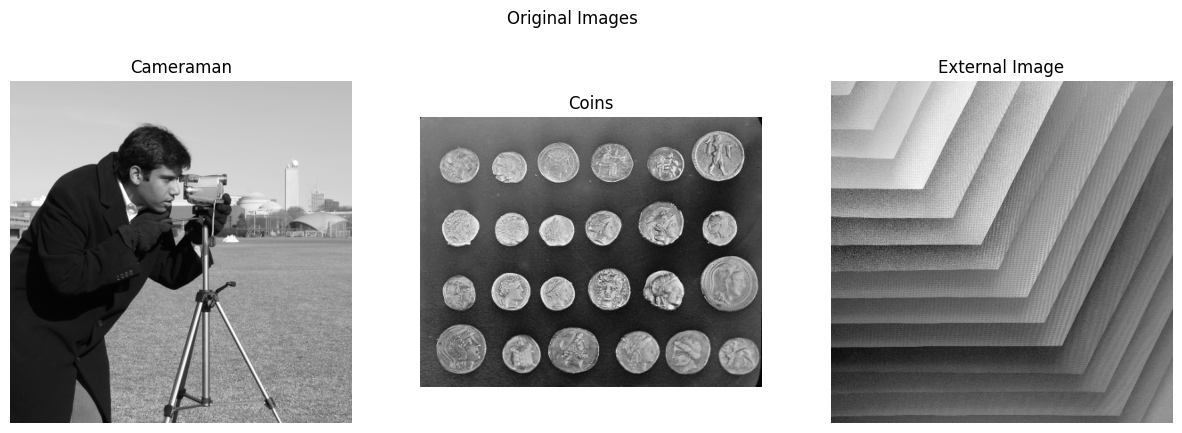

In [2]:
img_camera = data.camera()
img_coins = data.coins()

# Gambar external
img_ext = cv2.imread("../pexels-snapsbyclark-12981881.jpg", cv2.IMREAD_GRAYSCALE)

# reduksi ukuran gambar eksternal agar sesuai
img_ext = cv2.resize(img_ext, (512, 512))

show_images(
    [img_camera, img_coins, img_ext],
    ["Cameraman", "Coins", "External Image"],
    "Original Images"
)

### Implementasi Sobel Edge

In [ ]:
def sobel_edge(img: np.ndarray, ksize: int = 3) -> np.ndarray:
    """
    Menerapkan Sobel Edge Detection untuk mendeteksi tepi pada citra grayscale.    
    Parameter:
        - img: citra input dalam format numpy array (grayscale).
        - ksize: ukuran kernel Sobel (3, 5, atau 7).

    Returns:
        - np.ndarray: citra hasil deteksi tepi.
    """
    
    # Tahap 1: Hitung gradien arah X
    # cv2.Sobel(image, depth, dx, dy, ksize)
    # dx=1, dy=0 artinya menghitung turunan ke arah x (horizontal)
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
    
    # Tahap 2: Hitung gradien arah Y
    # dx=0, dy=1 artinya menghitung turunan ke arah y (vertikal)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # Tahap 3: Hitung magnitudo gradien total
    # Kombinasi kedua arah gradien menggunakan rumus Euclidean distance
    grad = np.sqrt(gx**2 + gy**2)
    
    # Tahap 4: Normalisasi hasil dan ubah ke format 8-bit
    # Clip nilai agar berada di rentang 0–255 dan ubah tipe data ke uint8
    return np.uint8(np.clip(grad, 0, 255))


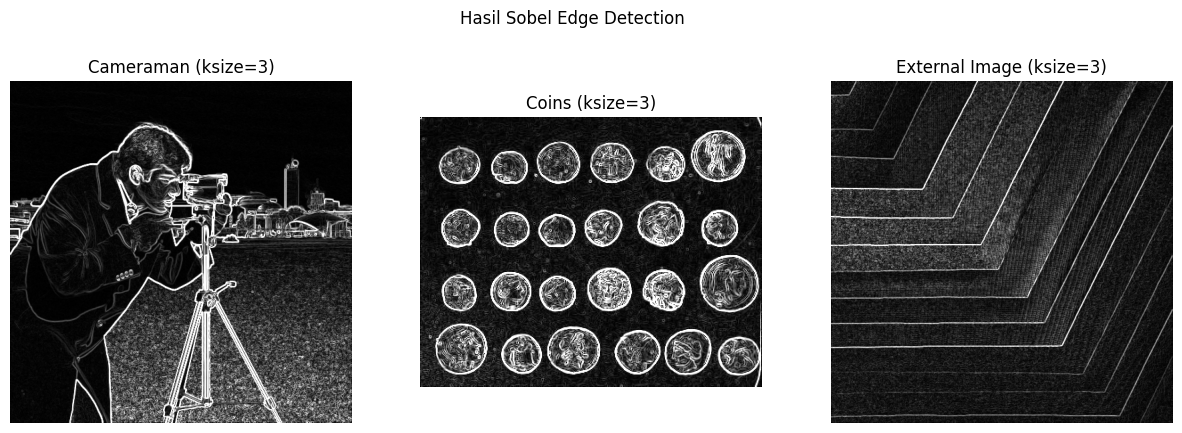

In [22]:
ksize = 3
camera_sobel = sobel_edge(img_camera, ksize=ksize)
coins_sobel = sobel_edge(img_coins, ksize=ksize)
ext_sobel = sobel_edge(img_ext, ksize=ksize)

show_images(
    [camera_sobel, coins_sobel, ext_sobel],
    [f"Cameraman (ksize={ksize})",
    f"Coins (ksize={ksize})",
    f"External Image (ksize={ksize})"],
    "Hasil Sobel Edge Detection"
)


### Implementasi Canny Edge Detection

In [13]:
def canny_edge(img: np.ndarray, low: int, high: int) -> np.ndarray:
    """
    Menerapkan Canny Edge Detection untuk mendeteksi tepi pada citra grayscale.
    
    Parameter:
        - img: citra input dalam format numpy array (grayscale).
        - low: threshold bawah untuk hysteresis.
        - high: threshold atas untuk hysteresis.

    Returns:
        - np.ndarray: citra hasil deteksi tepi.

    Tahapan utama dalam Canny Edge Detection:
        1) Gaussian blur → mengurangi noise pada citra
        2) Perhitungan gradien intensitas → mendeteksi perubahan arah tepi (mirip Sobel)
        3) Non-maximum suppression → mempertahankan hanya tepi yang paling tajam
        4) Hysteresis thresholding → menentukan tepi kuat dan lemah berdasarkan dua nilai ambang batas (low dan high)
    Keempat tahap tersebut secara otomatis dijalankan oleh fungsi cv2.Canny di OpenCV.
    """
    return cv2.Canny(img, threshold1=low, threshold2=high)

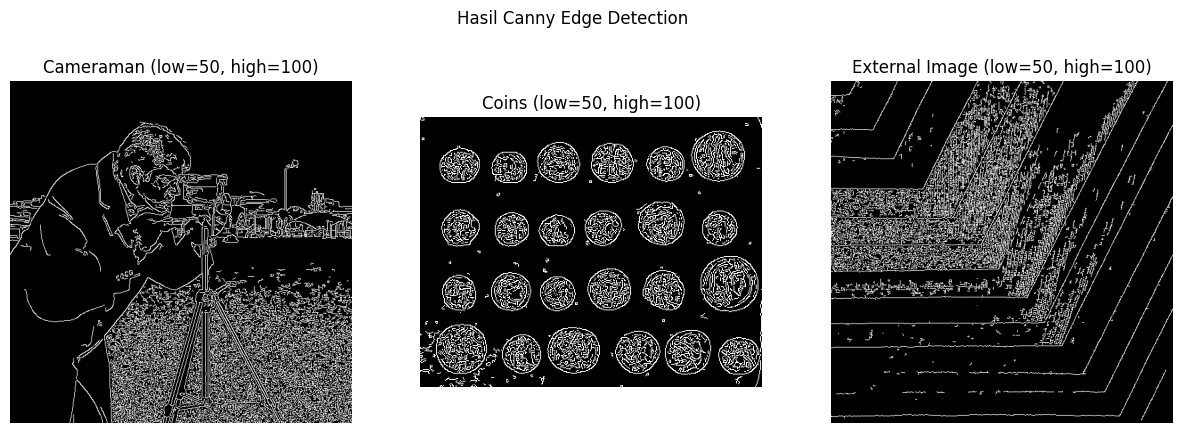

In [24]:
high_threshold = 100
low_threshold = 50

camera_canny = canny_edge(img_camera, low=low_threshold, high=high_threshold)
coins_canny = canny_edge(img_coins, low=low_threshold, high=high_threshold)
ext_canny = canny_edge(img_ext, low=low_threshold, high=high_threshold)

show_images(
    [camera_canny, coins_canny, ext_canny],
    [f"Cameraman (low={low_threshold}, high={high_threshold})",
    f"Coins (low={low_threshold}, high={high_threshold})",
    f"External Image (low={low_threshold}, high={high_threshold})"],
    "Hasil Canny Edge Detection"
)

### Eksplorasi parameter

bagian ini berfokus untuk memperlihatkan efek dari variasi parameter pada hasil edge detection.

**Tabel parameter uji untuk Sobel Edge**
<table>
  <tr>
    <th rowspan="1">Parameter</th>
    <th colspan="3">Values</th>
  </tr>
  <tr>
    <td>Kernel Size</td>
    <td>3</td>
    <td>5</td>
    <td>7</td>
  </tr>
</table>

**Tabel parameter uji untuk Canny Edge**
<table>
  <tr>
    <th rowspan="1">Parameter</th>
    <th colspan="3">Values</th>
  </tr>
  <tr>
    <td>High Threshold</td>
    <td>100</td>
    <td>200</td>
    <td>250</td>
  </tr>
  <tr>
    <td>Low Threshold</td>
    <td>50</td>
    <td>100</td>
    <td>150</td>
  </tr>
</table>

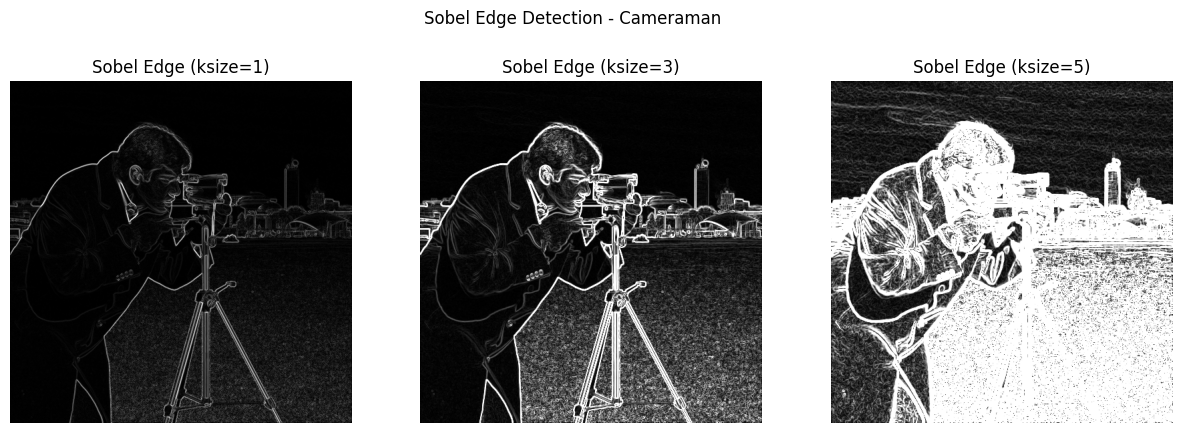

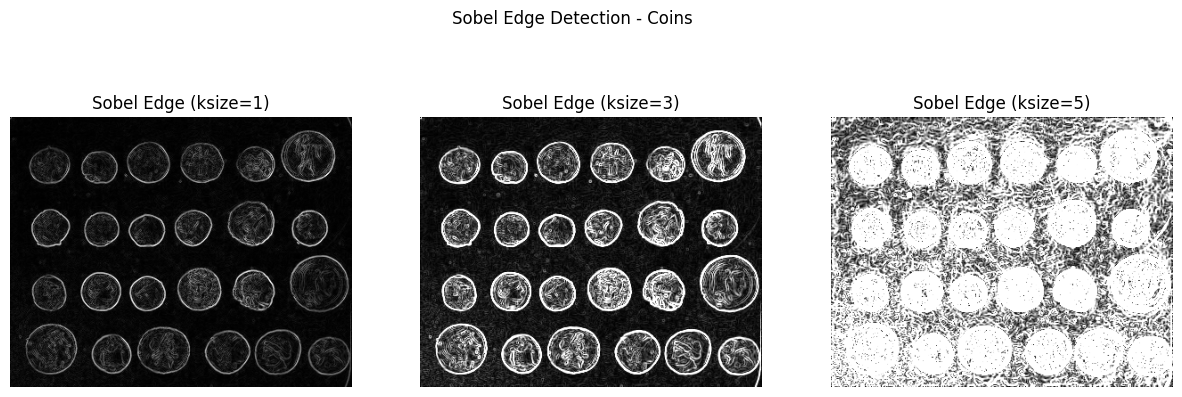

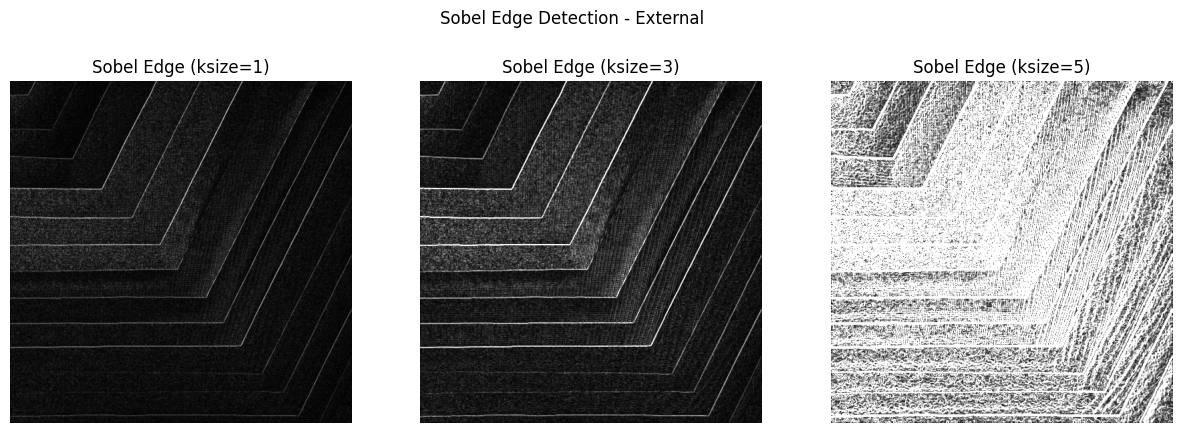

In [25]:
# eksplorasi parameter Sobel Edge Detection
res = {
    "Cameraman" : {},
    "Coins": {},
    "External": {}
}
for ksize in [1, 3, 5]:
    edge_camera = sobel_edge(img_camera, ksize=ksize)
    edge_coins = sobel_edge(img_coins, ksize=ksize)
    edge_ext = sobel_edge(img_ext, ksize=ksize)
    res["Cameraman"][ksize] = edge_camera
    res["Coins"][ksize] = edge_coins
    res["External"][ksize] = edge_ext

for img_name, edges in res.items():
    images = [edges[ksize] for ksize in [1, 3, 5]]
    titles = [f"Sobel Edge (ksize={ksize})" for ksize in [1, 3, 5]]
    show_images(images, titles, f"Sobel Edge Detection - {img_name}")


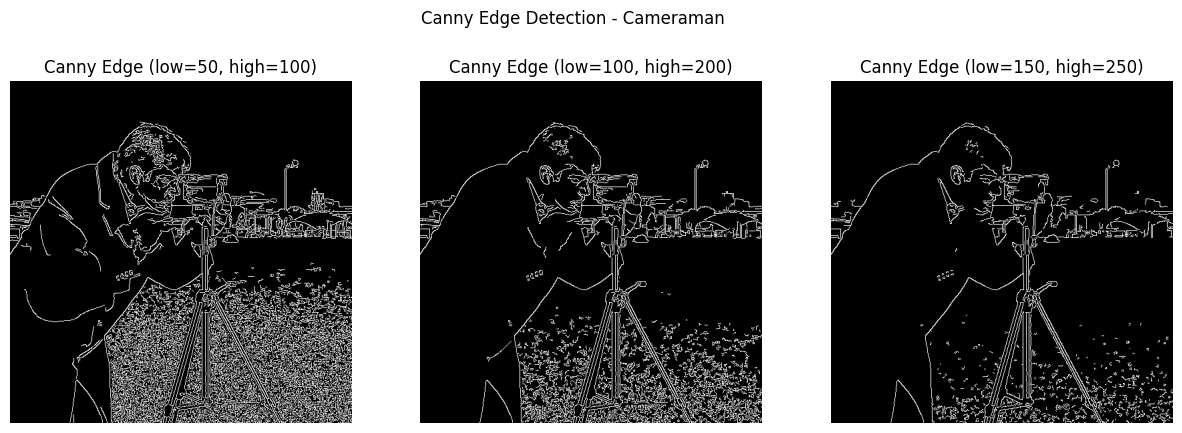

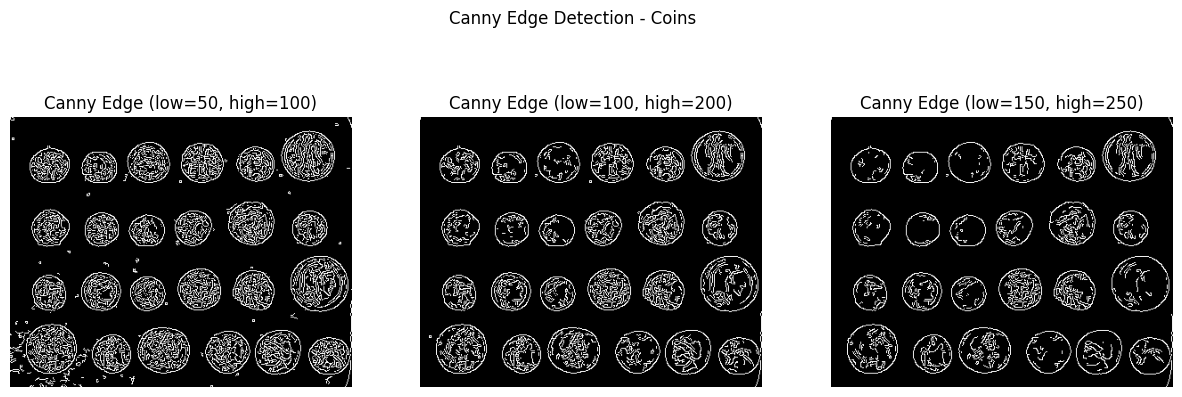

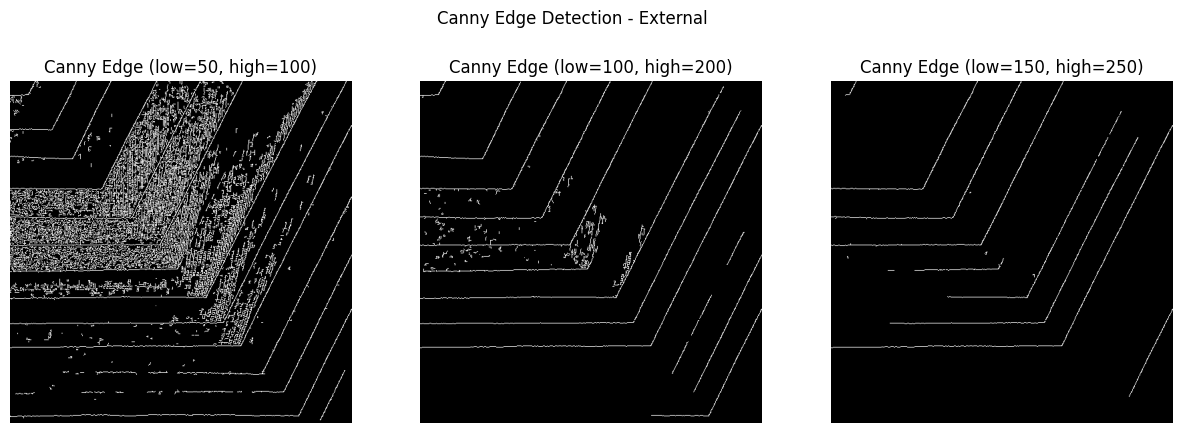

In [ ]:
# Eksplorasi parameter Canny Edge Detection
thresholds = [(50, 100), (100, 200), (150, 250)]

res = {
    "Cameraman" : {},
    "Coins": {},
    "External": {}
}

for low, high in thresholds:
    camera_canny = canny_edge(img_camera, low=low, high=high)
    coins_canny = canny_edge(img_coins, low=low, high=high)
    ext_canny = canny_edge(img_ext, low=low, high=high)

    res["Cameraman"][low, high] = camera_canny
    res["Coins"][low, high] = coins_canny
    res["External"][low, high] = ext_canny

for img_name, edges in res.items():
    images = [edges[thresh] for thresh in thresholds]
    titles = [f"Canny Edge (low={thresh[0]}, high={thresh[1]})" for thresh in thresholds]
    show_images(images, titles, f"Canny Edge Detection - {img_name}")

## ✅ Kesimpulan & Analisis

Pada percobaan menggunakan **Sobel edge detection**, terlihat bahwa **ukuran kernel `(ksize)`** memiliki pengaruh besar terhadap sensitivitas deteksi tepi. <br>
Ketika `ksize = 1`, deteksi tepi menjadi terlalu sempit dan hanya menangkap perubahan intensitas yang sangat tajam. Akibatnya, beberapa tepi halus tidak terdeteksi walaupun dengan noise yang relatif minim. <br>
Pada `ksize = 3`, hasil deteksi terlihat paling seimbang: sebagian besar tepi utama berhasil terdeteksi, namun masih terdapat sejumlah noise halus yang juga teridentifikasi sebagai tepi. <br>
Sedangkan pada `ksize = 5`, area yang dianggap sebagai tepi menjadi terlalu luas, menyebabkan sebagian besar permukaan terang (hampir putih) karena perhitungan gradien melebar dan banyak area dianggap memiliki perubahan intensitas signifikan. Hal ini menandakan bahwa kernel yang terlalu besar cenderung mengaburkan detail lokal dan memperluas area tepi secara berlebihan.

Fenomena serupa juga terjadi pada **Canny edge detection**, namun dipengaruhi oleh parameter **threshold**. <br>
Jika *low threshold* terlalu rendah, algoritma akan menganggap banyak piksel lemah sebagai bagian dari tepi, sehingga noise meningkat dan citra hasil tampak terlalu padat dengan garis. <br>
Sebaliknya, jika *high threshold* terlalu tinggi, hanya tepi dengan kontras sangat kuat yang terdeteksi, menyebabkan detail halus atau tepi lemah (misalnya bayangan atau tekstur lembut) terabaikan. <br>
Kombinasi nilai low dan *high threshold* yang moderat memberikan hasil paling stabil — mampu menyeimbangkan antara ketajaman tepi dan jumlah noise yang tertangkap.

Secara umum, hasil menunjukkan bahwa baik **Sobel maupun Canny memiliki trade-off** antara **sensitivitas dan ketahanan terhadap noise**, di mana pemilihan parameter yang tepat harus disesuaikan dengan karakteristik citra dan tujuan analisis tepi yang diinginkan.